#### Deep Neural Network
#### Session 1 

### MP Neuron

In [1]:
import os
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from sklearn.metrics import accuracy_score

### Setup Global Parameters

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)

In [3]:
NOISE = 0.2
EPOCHS = 200
ALPHA = 0.1
N_SAMPLES = 1000

In [4]:
params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
      'axes.labelsize': 'large',
      'axes.titlesize':'large',
      'xtick.labelsize':'large',
      'ytick.labelsize':'large'
}

In [5]:
plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

### Generate DataSet

#### Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest make_moon dataset generator.

In [6]:
data_df = pd.read_csv(r"..\input\breast_cancer_mod.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

### Visualisation

In [7]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [9]:
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000
mean,0.820738,0.880492,0.827768,0.954306,0.811951,0.910369,0.917399,0.899824,0.831283,0.927944,...,0.790861,0.868190,0.966608,0.762742,0.942004,0.926186,0.678383,0.956063,0.97891,0.627417
std,0.383909,0.324671,0.377914,0.209005,0.391095,0.285904,0.275520,0.300498,0.374831,0.258809,...,0.407052,0.338582,0.179816,0.425776,0.233942,0.261698,0.467508,0.205135,0.14381,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [10]:
data_df.target.unique()

array([0, 1], dtype=int64)

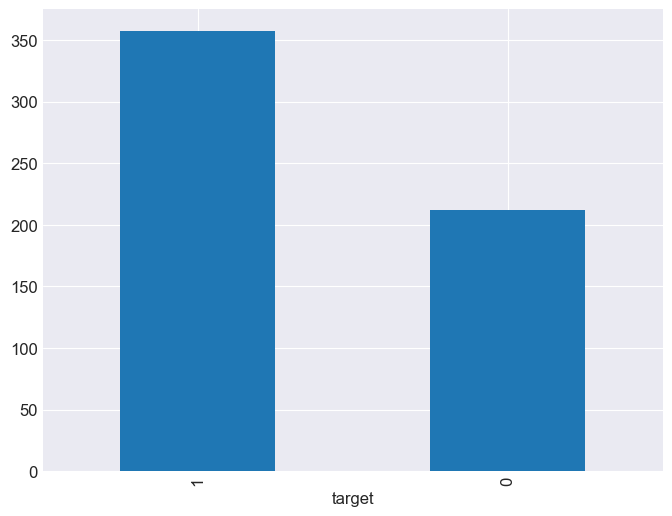

In [11]:
fig, ax = plt.subplots(figsize=(8,6)) #instantiate
data_df['target'].value_counts().plot(ax=ax, kind='bar');

In [12]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

features_df = data_df.drop('target', axis=1)

labels = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size = TEST_SIZE, random_state=RANDOM_STATE, stratify=labels)

In [13]:
# Introducing total named column in data_df

X_train['total'] = X_train.astype(np.int16).sum(axis=1)

X_train['target'] = y_train

X_train.sort_values('total', inplace=True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


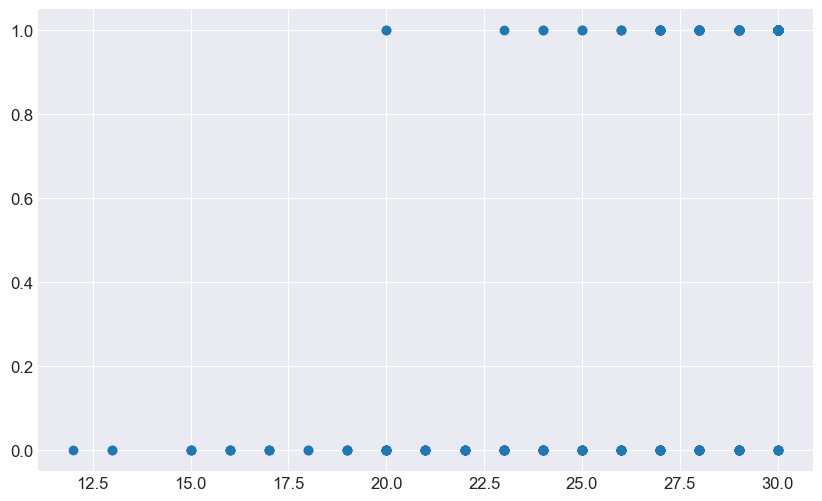

In [14]:
plt.scatter(X_train['total'], X_train['target'])


target     0      1
total              
12       1.0    NaN
13       2.0    NaN
15       4.0    NaN
16       4.0    NaN
17       4.0    NaN
18       2.0    NaN
19       4.0    NaN
20      10.0    2.0
21       9.0    NaN
22      11.0    NaN
23      17.0    1.0
24      17.0    2.0
25      15.0    2.0
26      12.0    3.0
27      15.0   16.0
28      21.0   32.0
29      15.0   50.0
30       7.0  177.0


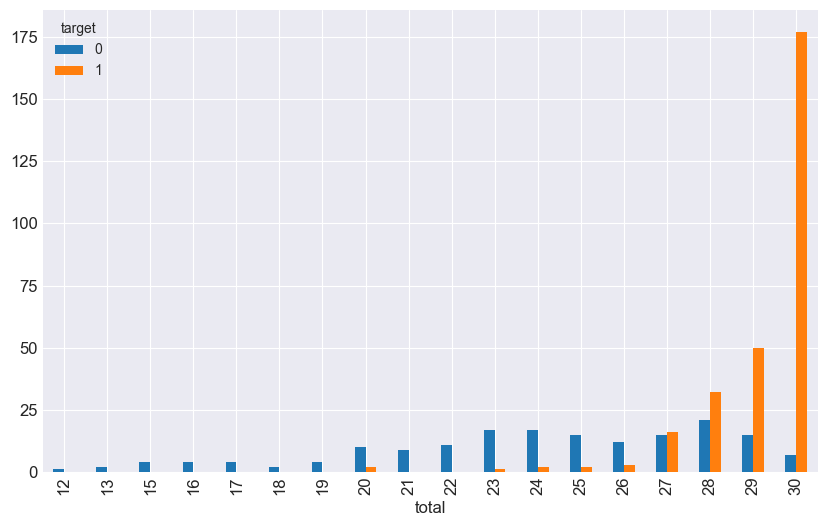

In [20]:
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'})
tmp_df.columns = ['count']

tmp_df.reset_index(inplace=True)

print(tmp_df.pivot(index= 'total', 
             columns = 'target', 
             values = 'count'))

tmp_df.pivot(index= 'total', 
             columns = 'target', 
             values = 'count').plot(kind='bar');

In [50]:
accuracy = {}

for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['target'], X_train['pred'])

In [51]:
print(accuracy)

{0: 0.6263736263736264, 1: 0.6263736263736264, 2: 0.6263736263736264, 3: 0.6263736263736264, 4: 0.6263736263736264, 5: 0.6263736263736264, 6: 0.6263736263736264, 7: 0.6263736263736264, 8: 0.6263736263736264, 9: 0.6263736263736264, 10: 0.6263736263736264, 11: 0.6263736263736264, 12: 0.6263736263736264, 13: 0.6285714285714286, 14: 0.6329670329670329, 15: 0.6329670329670329, 16: 0.6417582417582418, 17: 0.6505494505494506, 18: 0.6593406593406593, 19: 0.6637362637362637, 20: 0.6725274725274726, 21: 0.6901098901098901, 22: 0.7098901098901099, 23: 0.734065934065934, 24: 0.7692307692307693, 25: 0.8021978021978022, 26: 0.8307692307692308, 27: 0.8505494505494505, 28: 0.8483516483516483, 29: 0.8241758241758241, 30: 0.7472527472527473, 31: 0.37362637362637363, 32: 0.37362637362637363}


In [60]:
b_best = max(accuracy, key= accuracy.get)
b_best

27

In [61]:
accuracy[27]

0.8505494505494505

In [62]:
# Using best b calculate accuracy on test set

X_test['y_pred'] = X_test['total'] >= b_best

test_accuracy = accuracy_score(X_test['y_pred'], X_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 63.16 %


In [45]:
a = np.array([1,2,3])
a.shape

(3,)

In [46]:
a.T.shape

(3,)

In [48]:
a = np.array([[1,2,3]])
a.shape

(1, 3)

In [49]:
a.T.shape

(3, 1)